In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
train_data=pd.read_csv('Train.csv')
df=train_data.copy()
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


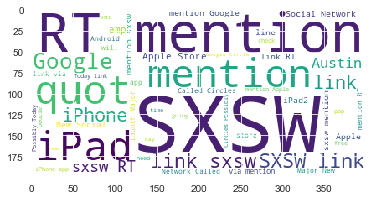

In [3]:
#Wordcloud-->
from wordcloud import WordCloud,STOPWORDS
wc=WordCloud(background_color='white',stopwords=set(STOPWORDS),
            max_words=50,random_state=42)
wc.generate(' '.join(df['Product_Description']))
plt.imshow(wc)

In [4]:
df.isnull().sum()

Text_ID                0
Product_Description    0
Product_Type           0
Sentiment              0
dtype: int64

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
df['numerics_count']=df['Product_Description'].apply(lambda x:len([x for x in x.split() if x.isdigit()]))
df['Upper_Count']=df['Product_Description'].apply(lambda x:len([x for x in x.split() if x.isupper()]))

In [7]:
df['Product_Description'][1]

'RT @mention Line for iPad 2 is longer today than yesterday. #SXSW  // are you getting in line again today just for fun?'

In [8]:
df['Product_Description'][2]

'Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers.'

In [9]:
df['Product_Description'][3]

'The lesson from Google One Pass: In this digital environment, users want to purchase across every platform with one tool. #sxsw #elonsxsw'

In [10]:
df['Product_Description'][4]

'RT @mention At the panel: &quot;Your mom has an ipad, designing for boomers&quot; #sxsw'

In [11]:
df['Product_Description'][5]

'RT @mention I think my effing hubby is in line for an #iPad 2. Can someone point him towards the line-up for wife number #2. #sxswi #sxsw'

In [12]:
df['Product_Type'].value_counts()

9    4070
6     665
2     465
7     327
3     300
5     213
8     194
1      59
0      52
4      19
Name: Product_Type, dtype: int64

In [13]:
df['Product_Description'][0]

'The Web Designer\x89Ûªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw'

In [26]:
a="#Kashish is #bad"
for i in a.split(' '):
    if('#' in i):
        count+=1
print(count)    

5


In [28]:
df['#_Count']=df['Product_Description'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))
df['@_Count']=df['Product_Description'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))

In [29]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,numerics_count,Upper_Count,#_Count,@_Count
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,1,0,1,1
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,1,2,1,1
2,8212,Crazy that Apple is opening a temporary store ...,9,2,0,0,1,0
3,4422,The lesson from Google One Pass: In this digit...,9,2,0,0,2,0
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,0,1,1,1


In [41]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)
    text = re.sub(r'#[a-zA-Z0-9_]+', '', text)
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

In [42]:
df['Product_Desc']=df['Product_Description'].apply(clean_text)

In [43]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,numerics_count,Upper_Count,#_Count,@_Count,Product_Desc
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,1,0,1,1,the web designer guide ios and android apps to...
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,1,2,1,1,line for ipad longer today than yesterday are ...
2,8212,Crazy that Apple is opening a temporary store ...,9,2,0,0,1,0,crazy that apple opening temporary store austi...
3,4422,The lesson from Google One Pass: In this digit...,9,2,0,0,2,0,the lesson from google one pass this digital e...
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,0,1,1,1,the panel quot your mom has ipad designing for...


In [46]:
df['Product_Description'][0]

'The Web Designer\x89Ûªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw'

In [45]:
    df['Product_Desc'][0]

'the web designer guide ios and android apps today link'

In [47]:
print(df['Product_Description'][1])
print(df['Product_Desc'][1])

RT @mention Line for iPad 2 is longer today than yesterday. #SXSW  // are you getting in line again today just for fun?
line for ipad longer today than yesterday are you getting line again today just for fun


In [48]:
print(df['Product_Description'][2])
print(df['Product_Desc'][2])

Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers.
crazy that apple opening temporary store austin tomorrow handle the rabid eye pad too seekers


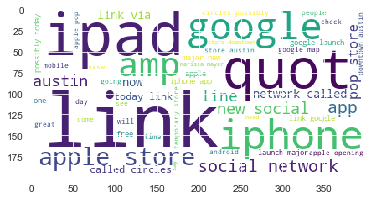

In [50]:
#Wordcloud-->
from wordcloud import WordCloud,STOPWORDS
wc=WordCloud(background_color='white',stopwords=set(STOPWORDS),
            max_words=50,random_state=42)
wc.generate(' '.join(df['Product_Desc']))
plt.imshow(wc)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf=TfidfVectorizer(max_features=1000,)

In [55]:
from nltk.corpus import stopwords

In [57]:
print(stopwords)

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>


In [58]:
df['word_count']=df['Product_Desc'].apply(lambda x:len(str(x).split()))

In [60]:
#Sentiment Polarity--->
from textblob import TextBlob
df['Polarity']=df.apply(lambda x:TextBlob(x['Product_Desc']).sentiment.polarity,axis=1)

In [61]:
df.head()

,Text_ID,Product_Description,Product_Type,Sentiment,numerics_count,Upper_Count,#_Count,@_Count,Product_Desc,word_count,Polarity
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2,1,0,1,1,the web designer guide ios and android apps to...,10,0.0
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2,1,2,1,1,line for ipad longer today than yesterday are ...,16,0.3
2,8212,Crazy that Apple is opening a temporary store ...,9,2,0,0,1,0,crazy that apple opening temporary store austi...,15,-0.6
3,4422,The lesson from Google One Pass: In this digit...,9,2,0,0,2,0,the lesson from google one pass this digital e...,18,0.0
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2,0,1,1,1,the panel quot your mom has ipad designing for...,11,0.0


In [62]:
df.drop(['Text_ID','Product_Description'],1,inplace=True)

In [63]:
df.head()

,Product_Type,Sentiment,numerics_count,Upper_Count,#_Count,@_Count,Product_Desc,word_count,Polarity
0,9,2,1,0,1,1,the web designer guide ios and android apps to...,10,0.0
1,9,2,1,2,1,1,line for ipad longer today than yesterday are ...,16,0.3
2,9,2,0,0,1,0,crazy that apple opening temporary store austi...,15,-0.6
3,9,2,0,0,2,0,the lesson from google one pass this digital e...,18,0.0
4,9,2,0,1,1,1,the panel quot your mom has ipad designing for...,11,0.0


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=1000,ngram_range=(1,4),lowercase=True)
X_text=tf.fit_transform(df['Product_Desc']).toarray()

In [65]:
df.columns

Index(['Product_Type', 'Sentiment', 'numerics_count', 'Upper_Count', '#_Count',
       '@_Count', 'Product_Desc', 'word_count', 'Polarity'],
      dtype='object')

In [66]:
df_num=df[['Product_Type', 'numerics_count', 'Upper_Count', '#_Count',
       '@_Count', 'word_count', 'Polarity']]

In [67]:
df_num=np.array(df_num)

In [68]:
X=np.concatenate((df_num,X_text),1)

In [69]:
y=df.Sentiment

In [70]:
df.shape


(6364, 9)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_features='log2',n_estimators=1000,verbose=1,n_jobs=1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   53.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.1s finished


0.9981512294324274

In [73]:
Y_pred=clf.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test,Y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished


0.8691099476439791

In [74]:
from sklearn.metrics import log_loss

In [75]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'multiclass',
         'num_class': 4,
         'boosting': 'gbdt',  
         'metric': 'multi_logloss',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 15,
         'bagging_fraction':0.9,
         'bagging_freq': 2,
         'feature_fraction': 0.9,
         'lambda_l2': 0.9,
         'min_data_per_group': 75,
         'max_bin': 255,
         'is_unbalance':True
         }

clf = lgb.train(params=param, 
                early_stopping_rounds=200,
                verbose_eval=100,
                train_set=train_data,
                valid_sets=[test_data])

y_pred = clf.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.225933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18777
[LightGBM] [Info] Number of data points in the train set: 5409, number of used features: 996
[LightGBM] [Info] Start training from score -4.096010
[LightGBM] [Info] Start training from score -2.775737
[LightGBM] [Info] Start training from score -0.531812
[LightGBM] [Info] Start training from score -1.098058
Training until validation scores don't improve for 200 rounds
[100]	valid_0's multi_logloss: 0.506923
[200]	valid_0's multi_logloss: 0.442691
[300]	valid_0's multi_logloss: 0.433341
[400]	valid_0's multi_logloss: 0.432181
[500]	valid_0's multi_logloss: 0.433003
Early stopping, best iteration is:
[351]	valid_0's multi_logloss: 0.4316


In [76]:

log_loss(y_test, y_pred)

0.4316004731224077